In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# captured_data = np.load("CaptureData/capture_080224_A_4_B_2_100MHz.npy")
captured_data = np.load("CaptureData/capture_082124_A_0_B_1_impulse_X1_16384_g.npy")
input0_offset=np.argmax(np.abs(captured_data[0])>0)
input1_offset=np.argmax(np.abs(captured_data[1])>0)
output0_offset=np.argmax(np.abs(captured_data[2])>0)
output1_offset=np.argmax(np.abs(captured_data[3])>0)

print("input0_offset: %s"%(input0_offset))
print("input1_offset: %s"%(input1_offset))
print("output0_offset: %s"%(output0_offset))
print("output1_offset: %s"%(output1_offset))

print("input0_offset%%8: %s"%(input0_offset%8))
print("input1_offset%%8: %s"%(input1_offset%8))
print("output0_offset%%8: %s"%(output0_offset%8))
print("output1_offset%%8: %s"%(output1_offset%8))

# Truncate to 12 bits from 16
input0 = captured_data[0]
input0 = np.right_shift(input0,4)
input0 = np.left_shift(input0,4).astype(np.int16)
# input0 = (input0*(2**4)).astype(np.int16)
input1 = captured_data[1]
input1 = np.right_shift(input1,4)
input1 = np.left_shift(input1,4).astype(np.int16)

output0 = captured_data[2]
output1 = captured_data[3]

print("input 0 first value: %s"%input0[input0_offset])
# print("output 0 first value: %s, div2: %s"%(output0[output0_offset],output0[output0_offset]/1))
print("input 1 first value: %s"%input1[input1_offset])
# print("output 1 first value: %s, div2: %s"%(output1[output1_offset],output1[output1_offset]/1))

input0_offset: 280
input1_offset: 0
output0_offset: 401
output1_offset: 0
input0_offset%8: 0
input1_offset%8: 0
output0_offset%8: 1
output1_offset%8: 0
input 0 first value: 4096
input 1 first value: -32


(200.0, 1000.0)

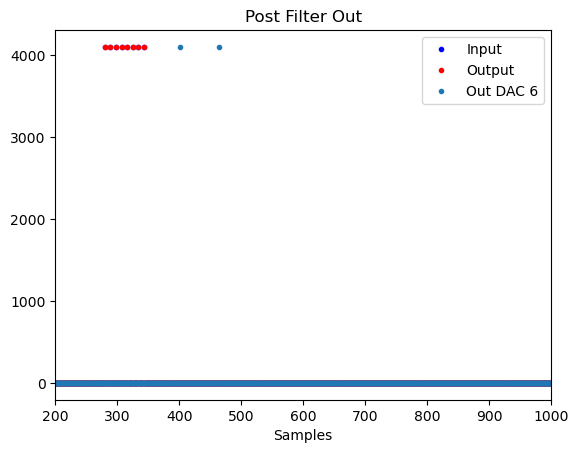

In [4]:
# for index in range(4):
#     plt.plot(np.array(range(len(captured_data[index]))), captured_data[index], linestyle="None", marker=".", label = "%s"%index)
#     # print("[%f, %f]"%(np.max(captured_data[index])/(2.0**15),np.min(captured_data[index])/(2.0**15)))
#     plt.xlabel("Samples")
#     plt.legend()
#     plt.xlim(200,1000)
#     plt.show()

plt.title("")
plt.plot(np.array(range(len(captured_data[0]))), captured_data[0], linestyle="None", 
         marker=".", label = "Input", color="b")
plt.plot(np.array(range(len(captured_data[2]))), captured_data[0], linestyle="None", 
         marker=".", label = "Output", color="r")
# print("[%f, %f]"%(np.max(captured_data[index])/(2.0**15),np.min(captured_data[index])/(2.0**15)))
plt.xlabel("Sample")
# plt.legend()
# plt.xlim(200,1000)

# plt.plot(np.array(range(len(captured_data[1]))), captured_data[1], linestyle="None", 
#          marker=".", label = "In ADC 1")
# # print("[%f, %f]"%(np.max(captured_data[index])/(2.0**15),np.min(captured_data[index])/(2.0**15)))
# plt.xlabel("Samples")
# plt.legend()
# plt.xlim(200,1000)
# plt.show()

# plt.title("Post Filter Out")
# plt.plot(np.array(range(len(captured_data[2]))), captured_data[2], linestyle="None", 
#          marker=".", label = "Out DAC 6")
# # print("[%f, %f]"%(np.max(captured_data[index])/(2.0**15),np.min(captured_data[index])/(2.0**15)))
# plt.xlabel("Samples")
# plt.legend()
# plt.xlim(200,1000)

# plt.plot(np.array(range(len(captured_data[3]))), captured_data[3], linestyle="None", 
#          marker=".", label = "Out DAC 7")
# # print("[%f, %f]"%(np.max(captured_data[index])/(2.0**15),np.min(captured_data[index])/(2.0**15)))
# plt.xlabel("Samples")
# plt.legend()
# plt.xlim(200,1000)
# plt.show()

In [8]:
phase0 = 0
if phase0 != 0:
    output0_decimated = output0[8:].reshape((-1,8))[:,[0,1]].reshape(-1)
    input0_decimated = input0[8-phase0:-phase0].reshape((-1,8))[:,[0,1]].reshape(-1)
    output0_samplenum = np.arange(len(output0))[8-phase0:-phase0].reshape((-1,8))[:,[0,1]].reshape(-1)
else:
    output0_decimated = output0[8:].reshape((-1,8))[:,[0,1]].reshape(-1)
    input0_decimated = input0[8-phase0:].reshape((-1,8))[:,[0,1]].reshape(-1)
    output0_samplenum = np.arange(len(output0))[8-phase0:].reshape((-1,8))[:,[0,1]].reshape(-1)

input0_offset_decimated=np.argmax(np.abs(input0_decimated)>0)
output0_offset_decimated=np.argmax(np.abs(output0_decimated)>0)

In [9]:
phase1 = 0
if phase1 != 0:
    output1_decimated = output1[8:-phase1].reshape((-1,8))[:,[0,1]].reshape(-1)
    input1_decimated = input1[8-phase1:-phase1].reshape((-1,8))[:,[0,1]].reshape(-1)
    output1_samplenum = np.arange(len(output1))[8-phase1:-phase1].reshape((-1,8))[:,[0,1]].reshape(-1)
else:
    output1_decimated = output1[8:].reshape((-1,8))[:,[0,1]].reshape(-1)
    input1_decimated = input1[8-phase1:].reshape((-1,8))[:,[0,1]].reshape(-1)
    output1_samplenum = np.arange(len(output1))[8-phase1:].reshape((-1,8))[:,[0,1]].reshape(-1)

input1_offset_decimated=np.argmax(np.abs(input0_decimated)>0)
output1_offset_decimated=np.argmax(np.abs(output0_decimated)>0)

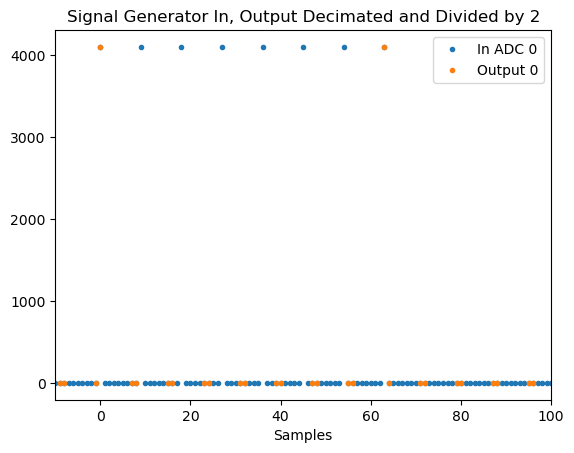

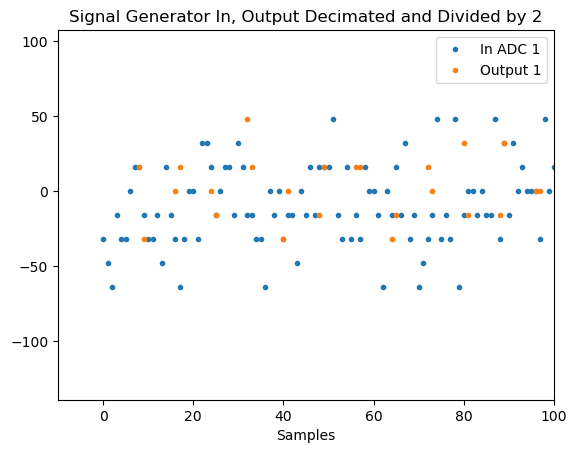

In [10]:
plt.title("Signal Generator In, Output Decimated and Divided by 2")
plt.plot(np.array(range(len(input0)))-input0_offset, input0, linestyle="None", 
         marker=".", label = "In ADC 0")
# print("[%f, %f]"%(np.max(captured_data[index])/(2.0**15),np.min(captured_data[index])/(2.0**15)))
plt.xlabel("Samples")
plt.legend()

plt.plot(output0_samplenum-output0_offset, output0_decimated, linestyle="None", 
         marker=".", label = "Output 0")
# print("[%f, %f]"%(np.max(captured_data[index])/(2.0**15),np.min(captured_data[index])/(2.0**15)))
plt.xlabel("Samples")
plt.legend()
plt.xlim(-10,100)
plt.show()

plt.title("Signal Generator In, Output Decimated and Divided by 2")
plt.plot(np.array(range(len(input1)))-input1_offset, input1, linestyle="None", 
         marker=".", label = "In ADC 1")
# print("[%f, %f]"%(np.max(captured_data[index])/(2.0**15),np.min(captured_data[index])/(2.0**15)))
plt.xlabel("Samples")
plt.legend()

plt.plot(output1_samplenum-output1_offset, output1_decimated, linestyle="None", 
         marker=".", label = "Output 1")
# print("[%f, %f]"%(np.max(captured_data[index])/(2.0**15),np.min(captured_data[index])/(2.0**15)))
plt.xlabel("Samples")
plt.legend()
plt.xlim(-10,100)
plt.show()

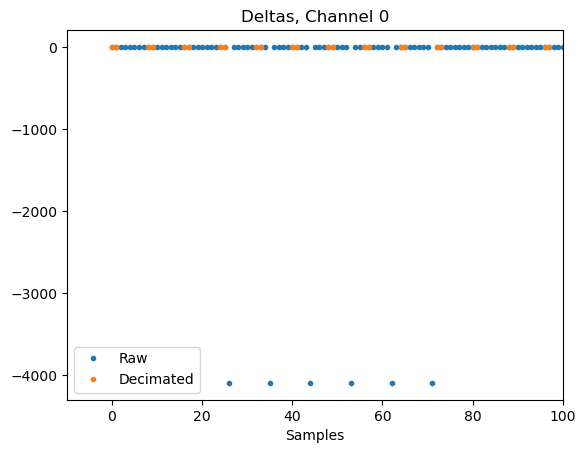

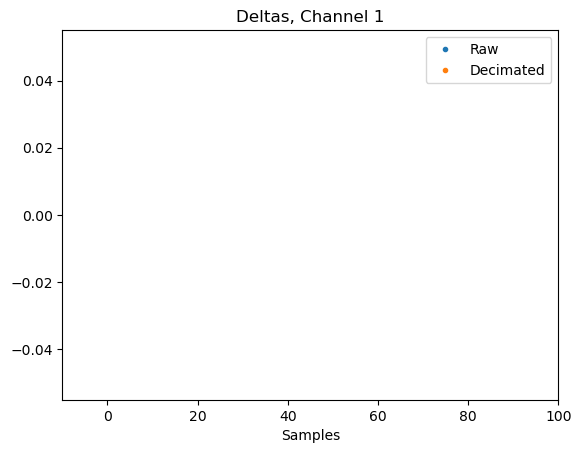

In [11]:
phase0 = 1
difference_chan0 =  ((output0/1)[output0_offset-24:776+output0_offset] - 
                    input0[input0_offset-24:776+input0_offset])
if(phase0):
    difference_chan0 = difference_chan0[8-phase0:-phase0]
difference_chan0_decimated = difference_chan0.reshape((-1,8))[:,[0,1]].reshape(-1)
difference_chan0_samples = np.array(range(len(difference_chan0))).reshape((-1,8))[:,[0,1]].reshape(-1)

phase1 = 1
difference_chan1 =  ((output1/1)[output1_offset-24:776+output1_offset]- 
                    input1[input1_offset-24:776+input1_offset])
if(phase1):
    difference_chan1 = difference_chan1[8-phase1:-phase1]
difference_chan1_decimated = difference_chan1.reshape((-1,8))[:,[0,1]].reshape(-1)
difference_chan1_samples = np.array(range(len(difference_chan1))).reshape((-1,8))[:,[0,1]].reshape(-1)

plt.plot( np.array(range(len(difference_chan0))), difference_chan0, linestyle="None", 
         marker=".", label = "Raw")

plt.title("Deltas, Channel 0")
plt.plot(difference_chan0_samples, difference_chan0_decimated, linestyle="None", 
         marker=".", label = "Decimated")


# print("[%f, %f]"%(np.max(captured_data[index])/(2.0**15),np.min(captured_data[index])/(2.0**15)))
plt.xlabel("Samples")
plt.legend()
plt.xlim(-10,100)
plt.show()

plt.title("Deltas, Channel 1")
plt.plot(np.array(range(len(difference_chan1))), difference_chan1, linestyle="None", 
         marker=".", label = "Raw")
plt.plot(difference_chan1_samples, difference_chan1_decimated, linestyle="None", 
         marker=".", label = "Decimated")
# print("[%f, %f]"%(np.max(captured_data[index])/(2.0**15),np.min(captured_data[index])/(2.0**15)))
plt.xlabel("Samples")
plt.legend()
plt.xlim(-10,100)
plt.show()

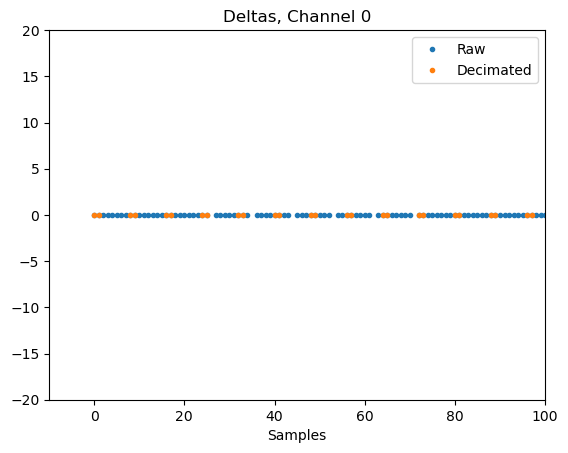

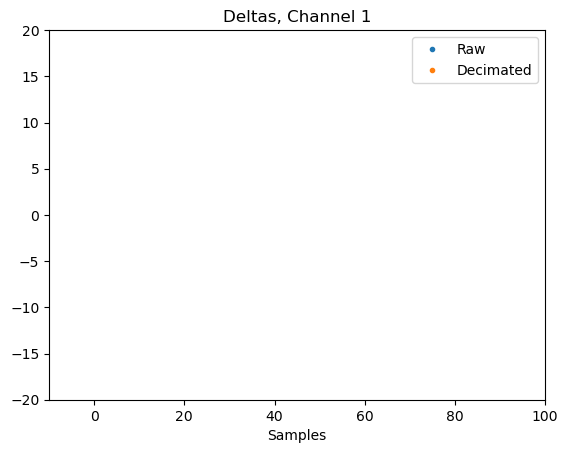

In [12]:
plt.plot( np.array(range(len(difference_chan0))), difference_chan0, linestyle="None", 
         marker=".", label = "Raw")

plt.title("Deltas, Channel 0")
plt.plot(difference_chan0_samples, difference_chan0_decimated, linestyle="None", 
         marker=".", label = "Decimated")


# print("[%f, %f]"%(np.max(captured_data[index])/(2.0**15),np.min(captured_data[index])/(2.0**15)))
plt.xlabel("Samples")
plt.legend()
plt.xlim(-10,100)
plt.ylim(-20,20)
plt.show()

plt.title("Deltas, Channel 1")
plt.plot(np.array(range(len(difference_chan1))), difference_chan1, linestyle="None", 
         marker=".", label = "Raw")
plt.plot(difference_chan1_samples, difference_chan1_decimated, linestyle="None", 
         marker=".", label = "Decimated")
# print("[%f, %f]"%(np.max(captured_data[index])/(2.0**15),np.min(captured_data[index])/(2.0**15)))
plt.xlabel("Samples")
plt.legend()
plt.xlim(-10,100)
plt.ylim(-20,20)
plt.show()

In [13]:
print(input0[input0_offset-24-phase0:776+input0_offset-phase0])
print((output0/2)[output0_offset-24:776+output0_offset])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0 4096    0    0
    0    0    0    0    0    0 4096    0    0    0    0    0    0    0
    0 4096    0    0    0    0    0    0    0    0 4096    0    0    0
    0    0    0    0    0 4096    0    0    0    0    0    0    0    0
 4096    0    0    0    0    0    0    0    0 4096    0    0    0    0
    0    0    0    0 4096    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [14]:
np.array([0,1,2,3,4,5,6,7,8,9])[7:]

array([7, 8, 9])